<a href="https://colab.research.google.com/github/Syafiqdwika/UAS_SyafiqDwikaArrasyid_3333210036/blob/main/UAS_Analitika_Data_Syafiq_Dwika_Arrasyid_3333210036.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deret Waktu**

Deret waktu adalah rangkaian titik data yang diindeks dalam urutan waktu dan digunakan untuk memprediksi masa depan berdasarkan nilai yang diamati sebelumnya. Deret waktu sangat sering diplot melalui diagram garis. Deret waktu digunakan dalam statistik, prakiraan cuaca, prediksi harga saham, pengenalan pola, prediksi gempa bumi, dll.

Analisis deret waktu terdiri dari metode untuk menganalisis data deret waktu untuk mengekstraksi statistik yang bermakna dan karakteristik data lainnya.

Peramalan deret waktu adalah penggunaan model untuk memprediksi nilai masa depan berdasarkan nilai yang diamati sebelumnya.

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

Pertama mengimport pandas, numpy, matplotlib.pyplot, seaborn, math, dan datetime

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/kapturovalexander/nvidia-amd-intel-asus-msi-share-prices

In [ ]:
# https://drive.google.com/file/d/10xmDx99fuu3FOZ3o9sTGAyDWTP308-Fh/view?usp=sharing

!gdown 10xmDx99fuu3FOZ3o9sTGAyDWTP308-Fh

Downloading...
From: https://drive.google.com/uc?id=10xmDx99fuu3FOZ3o9sTGAyDWTP308-Fh
To: /content/Intel (1980-2023).csv
100% 740k/740k [00:00<00:00, 166MB/s]


Pada forecasting ini pertama-tama mengimport dataset yang kita pilih di kaggle. Dataset yang saya pilih mengenai dataset Harga saham Intel (1980-2023)

In [ ]:
train_data = pd.read_csv('Intel (1980-2023).csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.184470,17068800
1,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.188933,18508800
2,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.188189,11174400
3,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.181494,12172800
4,1980-03-24,0.316406,0.316406,0.311198,0.311198,0.177775,8966400


Pada kodingan ini menampilkan data dari harga saham Intel selama 43 tahun. Dalam kodingan ini diantaranya menampilkan data seperti date, open, high, low, close, adj close, dan volume. Date yang merupakan tanggal yang biasanya digunakan dalam forecasting, pada harga saham pertama berada di tanggal 18-03-1980. Open merupakan harga pasar saham terbuka, harga pasar saham terbuka pertama berada di angka 0.325521. High merupakan harga pasar saham tertinggi, harga tertinggi pasar saham pertama berada di angka 0.328125. Low merupakan harga pasar saham terendah, harga pasar saham terendah pertama berada di angka 0.322917 . Close merupakan tutup harga pasar saham, tutup harga pasar saham pertama berada di angka 0.322917 dan Adj Close merupakan disesuaikan tutup harga penutupan pasar saham, Adj Close tutup harga pasar saham berada di angka 0.184470. Volume merupakan Jumlah total saham atau kontrak yang diperdagangkan untuk keamanan tertentu, volume nya berada di angka 17068800.

Periksa nilai yang hilang

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10859 entries, 0 to 10858
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10859 non-null  object 
 1   Open       10859 non-null  float64
 2   High       10859 non-null  float64
 3   Low        10859 non-null  float64
 4   Close      10859 non-null  float64
 5   Adj Close  10859 non-null  float64
 6   Volume     10859 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 594.0+ KB


Pada kodingan ini menampilkan dan memastikan bahwa di data apakah ada data yang missing value atau tidak ada. Dapat diliat dari panjang data. Pada data ini tidak ada missing karena dari panjang data tidak memiliki perbedaan.

Periksa nilai statistik untuk setiap fitur

In [ ]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,1.085900e+04
mean,19.834106,20.105102,19.565597,19.833531,14.636382,5.056303e+07
std,17.514871,17.756945,17.278878,17.514300,14.829796,3.487815e+07
min,0.218750,0.218750,0.216146,0.216146,0.123476,0.000000e+00
25%,1.328125,1.343750,1.304688,1.328125,0.758707,2.708505e+07
50%,20.277344,20.562500,20.010000,20.280001,12.665797,4.460160e+07
75%,29.980000,30.425000,29.520000,29.950001,19.808317,6.477205e+07
max,75.625000,75.828125,73.625000,74.875000,63.608189,5.677088e+08


Pada kodingan ini menampilkan dan mengecek seperti mean, standard deviasi, dan lain-lain

Tangani data waktu tanggal untuk deret waktu

In [ ]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-18,0.325521,0.328125,0.322917,0.322917,0.184470,17068800
1980-03-19,0.330729,0.335938,0.330729,0.330729,0.188933,18508800
1980-03-20,0.330729,0.334635,0.329427,0.329427,0.188189,11174400
1980-03-21,0.322917,0.322917,0.317708,0.317708,0.181494,12172800
1980-03-24,0.316406,0.316406,0.311198,0.311198,0.177775,8966400


Pada kodingan ini memasukkan date ke datetime agar jadi ke dalam format datetime dan menjadikan date atau hari, tanggal, dan tahun sebagai index.

**EXPLORATORY DATA ANALYSIS**

Sekarang mari kita visualisasikan Adjusted Close (Harga Saham saat pasar tutup)

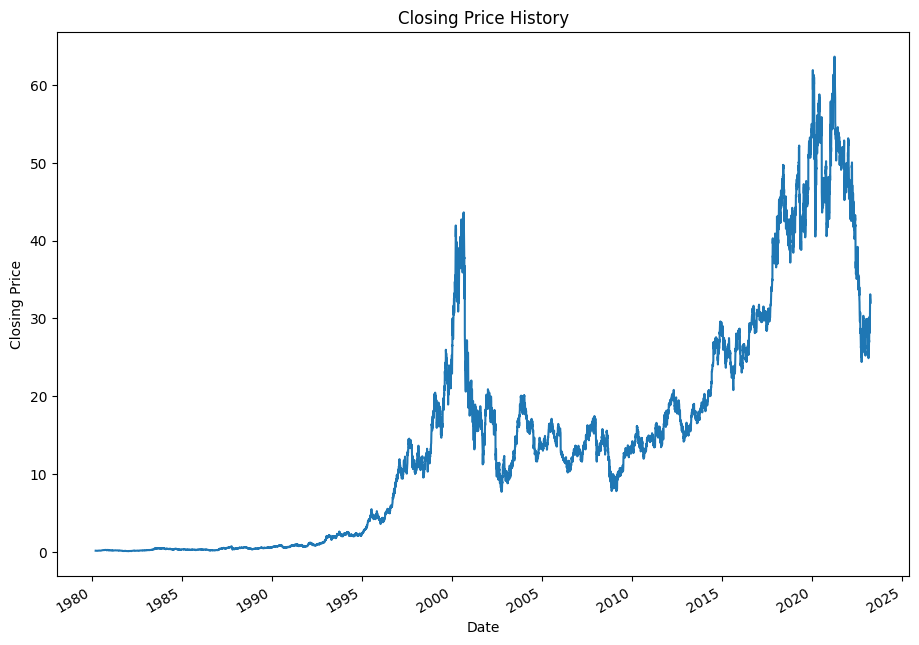

In [ ]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Pada kodingan ini menunjukkan closing price history. Data harga saham Intel selama 43 tahun terjadi kenaikan pada tahun 2000 dan juga mengalami kenaikan lagi pada tahun 2020 dan selanjutnya terjadi penurunan pada tahun 2023. Harga saham Intel selama 43 tahun dapat dikatakan memiliki tren yang cukup stabil.



<Figure size 1600x800 with 0 Axes>

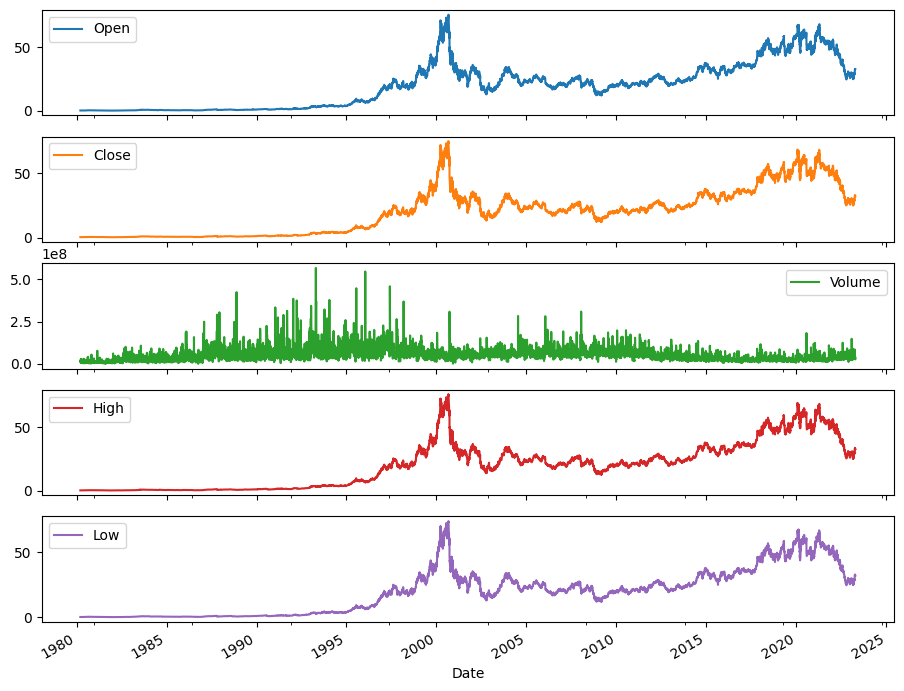

In [ ]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Pada kodingan ini menampilkan grafik dari tiap fitur dari mulai open, close, volume, high, dan low. Dari fitur open, close, high, dan low diatas dapat dikatakan memiliki kecenderungan naik pada tahun 2000 akhir dan selanjutnya memiliki trend penurunan sampai 2003 dan mengalami naik pada tahun 2020 dan selanjutnya memiliki tren penuruan sampai 2023. Sedangkan pada volume cenderung memiliki tren fluktuatif atau stationery.

In [ ]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

Pada kodingan ini membuat fitur yang akan digunakan dalam membaca harga tertinggi dan terendah dan harga penutupan dan pembukaannya dan bikin persentase nya

In [ ]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

Masukkkan kedua fitur baru tadi kedalam datasets

In [ ]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

543


<ipython-input-13-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


Membuat harga saham penutupan Intel sebagai label untuk memprediksi harga saham Intel pada hari itu

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Memakai beberapa library sklearn untuk membuat model algoritma data

Dari plot tersebut terlihat adanya peningkatan secara keseluruhan dalam trennya, dengan adanya beberapa musiman di dalamnya.

In [ ]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-15-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Memakai scaler untuk menormalisasikan data agar range data tidak terlalu jauh dan untuk mengurangi bias



In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [ ]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-17-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Slicing data untuk menentukan data inputan x dan y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting dataset untuk train dan test data

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [ ]:
lr_confidence

0.7417123978434907

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [ ]:
rf_confidence

0.8489589977916254

In [ ]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-23-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-23-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-23-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Menggambarkan langkah melakukan prediksi data masa depan dengan model Regressor Random Forest dan menyimpan hasil prediksi dalam dataframe serta menghasilkan waktu dalam detik

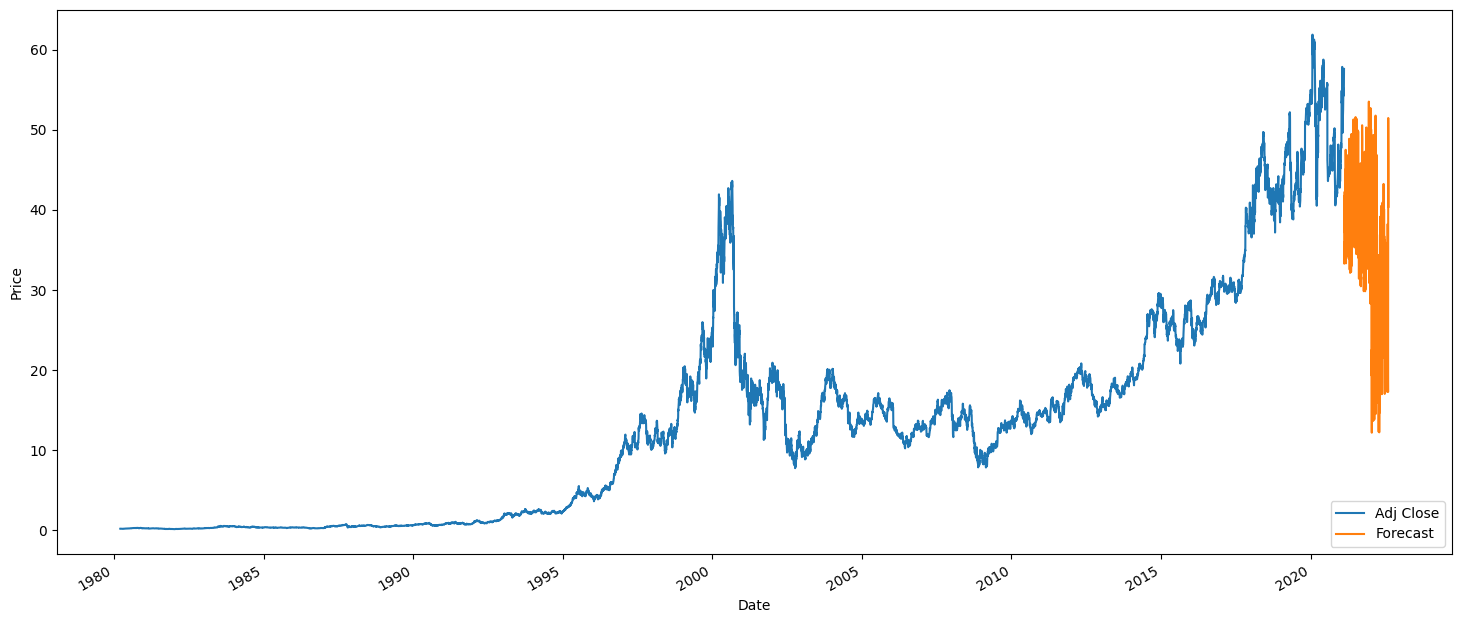

In [ ]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Prediksi selanjutnya digambarkan dalam grafik warna oren